In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
#fetch the data
mnist = fetch_mldata('MNIST original')

In [14]:
#get data and targets
target = mnist.target.reshape(mnist.target.shape[0], 1)
data = mnist.data

print ('shape of data and targets')
print ('\ndata shape: ', data.shape)
print ('target shape: ', target.shape)

shape of data and targets

data shape:  (70000, 784)
target shape:  (70000, 1)
hi


In [8]:
#train/test split (MNIST data set is already ready for split)
print ('splitting data to train and test sets')
X_train, X_test, y_train, y_test = data[:60000], data[60000:], target[:60000], target[60000:]

#shuffle training set so that same numbers don't appear in a row
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

splitting data to train and test sets


In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train.ravel())

#under the hood, scikit is training 10 binary classifiers (one for each class - OvA).
#when predicting, it will take the most confident classifier
print ('training SGD classifier...')

training SGD classifier...


In [49]:
some_digit = X_train[30000]
prediction = sgd_clf.predict(some_digit.reshape(1, -1))
actual = y_train[30000]
print ('prediction: {}, actual: {}'.format(prediction, actual))

prediction: [ 3.], actual: [ 3.]


results of the 10 classifiers: 
 [[-325805.64533859 -422183.15677885 -447663.16897136  341499.44495264
  -615792.21580277 -119514.97128174 -931869.84796071 -752996.90255021
  -889651.6228156  -657583.64207434]]


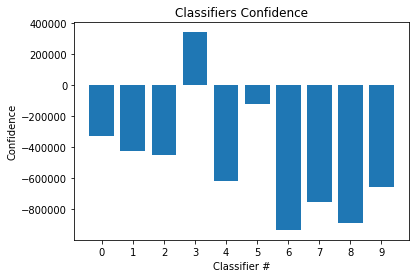

In [59]:
#see the results of the 10 classifiers
some_digit_scores = sgd_clf.decision_function([some_digit])
print ('results of the 10 classifiers: \n', some_digit_scores)

def plot_classifiers_confidence(scores):  
    plt.xlabel('Classifier #')
    plt.ylabel('Confidence')
    plt.title('Classifiers Confidence')
    x_axis = range(0, scores.shape[1])
    plt.xticks(x_axis)
    plt.bar(x_axis, scores.ravel())

plot_classifiers_confidence(some_digit_scores)

In [53]:
from sklearn.ensemble import RandomForestClassifier

#train a random forest classifier
print ('Training Random Forest classifier...')
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train.ravel())

Training Random Forest classifier...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

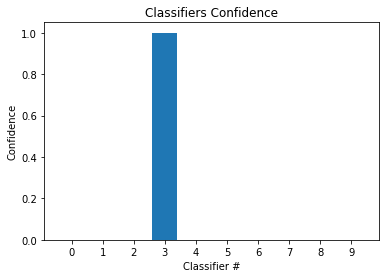

In [61]:
#see random forest classifiers confidence levels
clf_probs = random_forest_clf.predict_proba([some_digit])
plot_classifiers_confidence(clf_probs)

In [65]:
from sklearn.model_selection import cross_val_score

print('Computing accuracy for SGD classifier...')
cross_val_score(sgd_clf, X_train, y_train.ravel(), cv=3, scoring="accuracy")

Computing accuracy for SGD classifier...


array([ 0.86407718,  0.87834392,  0.87428114])

In [70]:
from sklearn.preprocessing import StandardScaler

print ('Adding a standard scaler and testing accuracy...')

#standard scarler will transform each value to a Z-score. Will help 
#the model to converge faster - better accuracy in same amount of time 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train.ravel(), cv=3, scoring="accuracy")

adding a standard scaler and testing accuracy...


array([ 0.90756849,  0.91139557,  0.90908636])